<a href="https://colab.research.google.com/github/Nacho2904/pasantiacsc/blob/main/apunte_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apunte de visualización de datos

## Elementos para una visualización exitosa

- Datos e información empleada
- Objetivo o función
- Metáfora visual
- Historia o concepto 

<img src="https://dasil.sites.grinnell.edu/wp-content/uploads/2016/04/DataViz.png" width=1200 height=600 />

## Plots

Los plots tienen objetivo y datos bien definidos y pueden contar una historia, y contienen una metáfora visual simple. Son útiles en la visualización científica y en el análisis exploratorio.

También funcionan como esqueleto de visualizaciones con metáforas visuales más complejas

Procedemos a importar los datos que usaremos

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
datos = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")
datos.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Distribuciones continuas

#### Histograma

El histograma es una aproximación a la distribución de probabilidad de una variable particular, de forma que vamos metiendo observaciones de dicha variable en "bins" y contamos cuantas observaciones han caído en cada bin, aproximando así la frecuencia de cada observación.

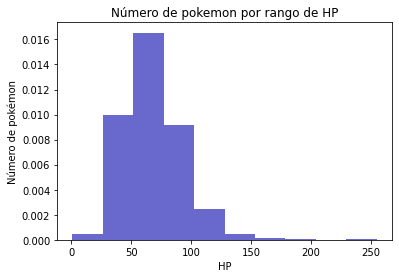

In [89]:
n, bins, patches = plt.hist(x=datos["HP"], bins = 10, color='#0504aa',
                            alpha=0.6, rwidth=1, density = 1)
plt.xlabel('HP')
plt.ylabel('Número de pokémon')
plt.title('Número de pokemon por rango de HP');

In [87]:
bins[2], bins[3]

(51.8, 77.19999999999999)

Mediante el parámetro *density* podemos hacer que el histograma muestre la probabilidad medida empíricamente de que un pokemon haya sido creado en determinada generación. En el gráfico de arriba podemos observar que alrededor de un 16% de los pokemon tienen entre 51 y 77 HP de base

Es importante escoger bien el número de bins. Un bajo número de bins puede "escondernos" información que nos sería interesante, mientras que un alto número de bins hace feo a nuestro plot, además de que complejiza la distribución al punto de que pierde sus rasgos. Con el bajo número de bins escogidos arriba pudimos dilucidar esa estadística acerca del HP de los pokemon.

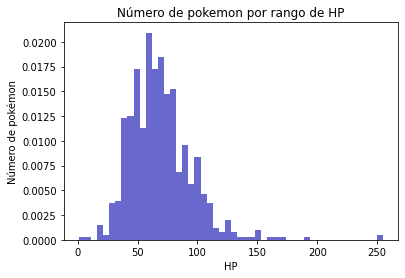

In [90]:
n, bins, patches = plt.hist(x=datos["HP"], bins = 50, color='#0504aa',
                            alpha=0.6, rwidth=1, density = 1)
plt.xlabel('HP')
plt.ylabel('Número de pokémon')
plt.title('Número de pokemon por rango de HP');

En cambio, con este número más alto de bins, notamos que la distribución se ve con mayor resolución (tiene pinta de distribución Gamma).

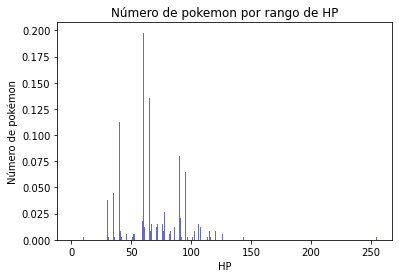

In [91]:
n, bins, patches = plt.hist(x=datos["HP"], bins = 600, color='#0504aa',
                            alpha=0.6, rwidth=1, density = 1)
plt.xlabel('HP')
plt.ylabel('Número de pokémon')
plt.title('Número de pokemon por rango de HP');

Finalmente, viendo un caso muy extremo, observamos como con un muy alto número de bins el gráfico pierde sus características útiles.

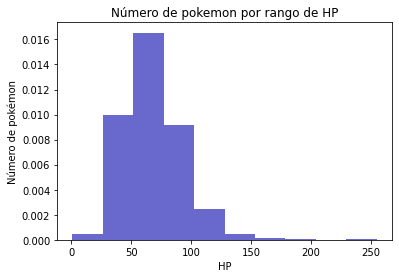

In [92]:
n, bins, patches = plt.hist(x=datos["HP"], color='#0504aa',
                            alpha=0.6, rwidth=1, density = 1)
plt.xlabel('HP')
plt.ylabel('Número de pokémon')
plt.title('Número de pokemon por rango de HP');

Vemos que matplotlib escoge un número relativamente razonable de bins de forma automática, en este caso 10.

### Density plots

Como bien dice su nombre, los plots de densidad grafican una aproximación de la función de densidad de la variable que estamos analizando, intentando hacer un histograma con bins de longitud infinitesimal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


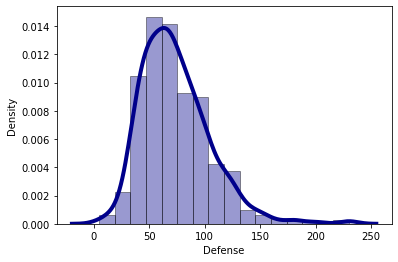

In [104]:
sns.distplot(datos['Defense'], hist=True, kde=True, 
             bins=int(len(datos)/50), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Los problemas con los density plot es que requieren conocimiento más técnico para analizarlos con profundidad, puesto que no se tiene una noción clara de las cantidades de observaciones en cada bin. Otro problema claro es que el density plot "adivina" valores para los cuales no tiene observaciones, cosa que podemos ver cuando en el gráfico tira valores de ataque **negativos**, cosa imposible.

### Box plot

Los box plots sintetizan eficazmente varias estadísticas relevantes de nuestros datos, como los cuartiles Q1, Q2 (mediana), Q3, rango intercuartílico (IQR), outliers, mínimo y máximo. 

In [129]:
stats = pd.DataFrame(datos[["Total", "HP", "Attack", "Sp. Atk", "Defense", "Sp. Def", "Speed"]])
stats

,Total,HP,Attack,Sp. Atk,Defense,Sp. Def,Speed
0,318,45,49,65,49,65,45
1,405,60,62,80,63,80,60
2,525,80,82,100,83,100,80
3,625,80,100,122,123,120,80
4,309,39,52,60,43,50,65
...,...,...,...,...,...,...,...
795,600,50,100,100,150,150,50
796,700,50,160,160,110,110,110
797,600,80,110,150,60,130,70
798,680,80,160,170,60,130,80


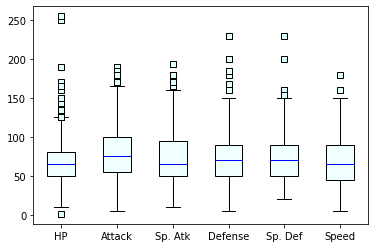

In [157]:
blue_square = dict(markerfacecolor='lightcyan', marker='s')
fig = plt.boxplot([stats.iloc[:,i] for i in range(1, len(stats.columns))], flierprops=blue_square,
                  patch_artist=True, medianprops=dict(color="blue"), boxprops = dict(facecolor="azure"))
plt.xticks(range(1,7), stats.columns[1:]);